In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx import *
import random
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms.approximation import min_weighted_dominating_set
# from networkx.algorithms.approximation import dominating_set





In [202]:
random.seed(42)
x_vals = random.sample(range(1, 10), 5)
y_vals = random.sample(range(1, 10), 5)
z_vals = [0]*5

coordinates = list(zip(x_vals,y_vals,z_vals))

In [203]:
coordinates

[(2, 4, 0), (1, 3, 0), (6, 6, 0), (3, 1, 0), (9, 5, 0)]

In [204]:
A = np.array(coordinates)
print(A)

[[2 4 0]
 [1 3 0]
 [6 6 0]
 [3 1 0]
 [9 5 0]]


In [205]:
B = squareform(pdist(A))
print(B)
# B = list(B)
# print(B)

[[0.         1.41421356 4.47213595 3.16227766 7.07106781]
 [1.41421356 0.         5.83095189 2.82842712 8.24621125]
 [4.47213595 5.83095189 0.         5.83095189 3.16227766]
 [3.16227766 2.82842712 5.83095189 0.         7.21110255]
 [7.07106781 8.24621125 3.16227766 7.21110255 0.        ]]


<class 'networkx.classes.graph.Graph'>


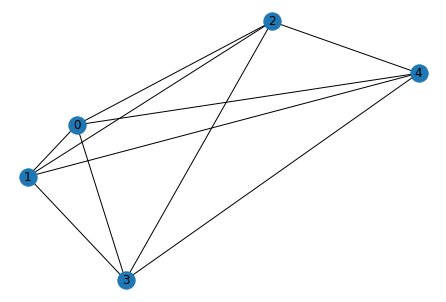

In [206]:
G = networkx.from_numpy_matrix(B)
position_dict = {}
for i in range(5):
    position_dict[i] = [x_vals[i], y_vals[i]]
nx.draw(G, with_labels = True, pos = position_dict)
print(type(G) )

In [207]:
for i in range(5):
    for j in range(5):
        if G.get_edge_data(i,j) !=None:
            print( "i=",i,"j=",j,G.get_edge_data(i,j)['weight'])

i= 0 j= 1 1.4142135623730951
i= 0 j= 2 4.47213595499958
i= 0 j= 3 3.1622776601683795
i= 0 j= 4 7.0710678118654755
i= 1 j= 0 1.4142135623730951
i= 1 j= 2 5.830951894845301
i= 1 j= 3 2.8284271247461903
i= 1 j= 4 8.246211251235321
i= 2 j= 0 4.47213595499958
i= 2 j= 1 5.830951894845301
i= 2 j= 3 5.830951894845301
i= 2 j= 4 3.1622776601683795
i= 3 j= 0 3.1622776601683795
i= 3 j= 1 2.8284271247461903
i= 3 j= 2 5.830951894845301
i= 3 j= 4 7.211102550927978
i= 4 j= 0 7.0710678118654755
i= 4 j= 1 8.246211251235321
i= 4 j= 2 3.1622776601683795
i= 4 j= 3 7.211102550927978


In [208]:
for i in range(5):
    for j in range(5):
        if (i!=j):
            if G.get_edge_data(i,j) !=None:
                if (G.get_edge_data(i,j)['weight']>5):
                    print("i=",i, "j=",j)
                    G.remove_edge(i,j)

i= 0 j= 4
i= 1 j= 2
i= 1 j= 4
i= 2 j= 3
i= 3 j= 4


In [209]:
for i in range(5):
    for j in range(5):
        print( "i=",i,"j=",j,G.get_edge_data(i,j))
# print( G.get_edge_data(2,1))           

i= 0 j= 0 None
i= 0 j= 1 {'weight': 1.4142135623730951}
i= 0 j= 2 {'weight': 4.47213595499958}
i= 0 j= 3 {'weight': 3.1622776601683795}
i= 0 j= 4 None
i= 1 j= 0 {'weight': 1.4142135623730951}
i= 1 j= 1 None
i= 1 j= 2 None
i= 1 j= 3 {'weight': 2.8284271247461903}
i= 1 j= 4 None
i= 2 j= 0 {'weight': 4.47213595499958}
i= 2 j= 1 None
i= 2 j= 2 None
i= 2 j= 3 None
i= 2 j= 4 {'weight': 3.1622776601683795}
i= 3 j= 0 {'weight': 3.1622776601683795}
i= 3 j= 1 {'weight': 2.8284271247461903}
i= 3 j= 2 None
i= 3 j= 3 None
i= 3 j= 4 None
i= 4 j= 0 None
i= 4 j= 1 None
i= 4 j= 2 {'weight': 3.1622776601683795}
i= 4 j= 3 None
i= 4 j= 4 None


In [210]:
vertex = nx.algorithms.approximation.min_weighted_vertex_cover(G)
print(vertex)

{0, 1, 2, 4}


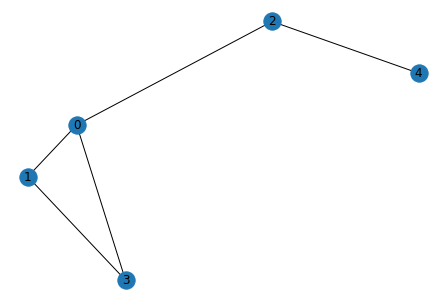

In [211]:
nx.draw(G, with_labels = True, pos = position_dict)

In [212]:
print(dominating_set(G))

TypeError: 'module' object is not callable

In [213]:
print (min_weighted_dominating_set(G))

{0, 1, 2}
